<a href="https://colab.research.google.com/github/AaftabAalam/machine-learning/blob/main/8_introduction_to_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L


GPU 0: Tesla T4 (UUID: GPU-5d1522c8-0f2b-3a78-c307-42388e51509e)


In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-03-07 15:55:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-07 15:55:20 (106 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
 from helper_functions import unzip_data,create_tensorboard_callback,plot_loss_curves,compare_historys

In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-03-07 15:55:24--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   530KB/s    in 1.1s    

2023-03-07 15:55:25 (530 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head(),test_df.head()



(   id keyword location                                               text  \
 0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
 1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
 2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
 3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
 4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
 
    target  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  ,
    id keyword location                                               text
 0   0     NaN      NaN                 Just happened a terrible car crash
 1   2     NaN      NaN  Heard about #earthquake is different cities, s...
 2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
 3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
 4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan)

In [ ]:
train_df_shuffled = train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(train_df),len(test_df)

(7613, 3263)

In [ ]:
import random
random_index = random.randint(0,len(train_df)-5)
for row in train_df_shuffled[['text','target']][random_index:random_index+5].itertuples():
  _,text,target = row
  print(f"Target:{target}","(real disaster)" if target>0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target:1 (real disaster)
Text:
IT STARTS A FOREST FIRE THAT CANNOT BE PUT OUT. http://t.co/3STfmN26r9

---

Target:1 (real disaster)
Text:
Deputies: Man shot before Brighton home set ablaze http://t.co/gWNRhMSO8k

---

Target:1 (real disaster)
Text:
@ThatSabineGirl you get me sis. this planet could do with a huge dose of obliteration.

---

Target:0 (not real disaster)
Text:
Evildead - Annihilation of Civilization http://t.co/sPfkE5Kqu4

---

Target:0 (not real disaster)
Text:
29% of #oil and #gas organizations have no real-time insight on #cyber threats. See how #EY can help http://t.co/qamgvQAFzc

---



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences,val_sentences,train_labels,val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                         train_df_shuffled["target"].to_numpy(),
                                                                         test_size=0.1,
                                                                         random_state=42)

In [ ]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [ ]:
val_sentences[:10],val_labels[:10],train_labels[:10]

(array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
        'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
        'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
        '@camilacabello97 Internally and externally screaming',
        'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov',
        'Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8',
        'How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd',
        "Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over so

In [ ]:
train_sentences[:10],val_sentences[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array(['D

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
text_vectorizer = TextVectorization(max_tokens=10000,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None,
                                    pad_to_max_tokens=True)

In [ ]:
train_sentences[0].split()

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']

In [ ]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length,
                                    )

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "There's a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
random_sentence = random.choice(train_sentences)
print(f"Original Text :\n{random_sentence}\n\n Vectorized version:")
text_vectorizer([random_sentence])

Original Text :
@OKgooner hahaha great song. 'Spent 15 years getting loaded. 15 years till his liver exploded. Now what's Bob going to do NOW that he...'

 Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1, 5519,  196,  528, 1589,  426,  141,  209, 5206,  426,  141,
        1108,   79,    1,  460]])>

In [ ]:
# Getting the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab :{len(words_in_vocab)}")
print(f"5 most common words:{top_5_words}")
print(f"5 least common words:{bottom_5_words}")

Number of words in vocab :10000
5 most common words:['', '[UNK]', 'the', 'a', 'in']
5 least common words:['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=max_length,
                             )
embedding

In [ ]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nEmbedded version:")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Learning from the Legacy of a Catastrophic Eruption - The New Yorker http://t.co/vMWTOUyOHm

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04426111,  0.02466512,  0.00456472, ..., -0.01179362,
         -0.04925448, -0.00652989],
        [ 0.01539152, -0.01432582,  0.00522723, ..., -0.00938693,
          0.03306664,  0.03930983],
        [-0.04756128,  0.03877484, -0.00954781, ..., -0.0219805 ,
          0.00061873, -0.00298148],
        ...,
        [ 0.00816881,  0.02131477,  0.01087331, ..., -0.03464393,
         -0.00854044, -0.01384871],
        [ 0.00816881,  0.02131477,  0.01087331, ..., -0.03464393,
         -0.00854044, -0.01384871],
        [ 0.00816881,  0.02131477,  0.01087331, ..., -0.03464393,
         -0.00854044, -0.01384871]]], dtype=float32)>

In [ ]:
sample_embed[0][0],sample_embed[0][0].shape,sample_embed.shape

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.04426111,  0.02466512,  0.00456472, -0.03099208,  0.02727392,
        -0.02806588,  0.03337925, -0.00382686, -0.00209787, -0.04034967,
        -0.02897713, -0.03646665, -0.0132078 , -0.00846935,  0.01978618,
        -0.02409177,  0.02600088,  0.03124801,  0.00536196, -0.02366638,
        -0.04522941,  0.02433287,  0.0077685 , -0.01441278,  0.04722695,
         0.03292863,  0.03722965,  0.01464497,  0.03458159,  0.03055373,
        -0.01758503,  0.03733087,  0.02978183, -0.04618447, -0.02675277,
         0.02916468, -0.04402294, -0.028482  ,  0.0342455 , -0.02366219,
        -0.00537404,  0.04641852, -0.03418915, -0.01521153,  0.03435642,
         0.02106297, -0.00486981,  0.00582777,  0.01554402, -0.03377401,
        -0.04383186,  0.01444602, -0.03249389, -0.00829203,  0.02469819,
        -0.01731133, -0.0091275 ,  0.01139801, -0.00181911, -0.02437207,
         0.03733261,  0.01783403, -0.00448712, -0.04082458,  0.00207347,
  

In [ ]:
from numpy.core.fromnumeric import shape
print(f"For single sentence embed :{sample_embed[0][0]}\n\nshape of single sample_embed:\n\n{sample_embed[0][0].shape}")

For single sentence embed :[ 0.04426111  0.02466512  0.00456472 -0.03099208  0.02727392 -0.02806588
  0.03337925 -0.00382686 -0.00209787 -0.04034967 -0.02897713 -0.03646665
 -0.0132078  -0.00846935  0.01978618 -0.02409177  0.02600088  0.03124801
  0.00536196 -0.02366638 -0.04522941  0.02433287  0.0077685  -0.01441278
  0.04722695  0.03292863  0.03722965  0.01464497  0.03458159  0.03055373
 -0.01758503  0.03733087  0.02978183 -0.04618447 -0.02675277  0.02916468
 -0.04402294 -0.028482    0.0342455  -0.02366219 -0.00537404  0.04641852
 -0.03418915 -0.01521153  0.03435642  0.02106297 -0.00486981  0.00582777
  0.01554402 -0.03377401 -0.04383186  0.01444602 -0.03249389 -0.00829203
  0.02469819 -0.01731133 -0.0091275   0.01139801 -0.00181911 -0.02437207
  0.03733261  0.01783403 -0.00448712 -0.04082458  0.00207347  0.04159608
 -0.01069523  0.01773259  0.02011318  0.0344511  -0.04273424 -0.00350057
 -0.02270614 -0.00288547 -0.01053976  0.00274187  0.00715083 -0.03623376
 -0.04535601  0.01869426

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])

model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences,val_labels)
print(f"Our baseline modle achieves an accuracy of :{baseline_score*100:.2f}%")

Our baseline modle achieves an accuracy of :79.27%


In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  """
  Calculate model,accuracy,precision,recall and f1 score of a binary classification model.
  """
  model_accuracy = accuracy_score(y_true,y_pred)*100
  model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_pred,average="weighted")
  model_results = {"accuracy":model_accuracy,
                   "precision":model_precision,
                   "recall":model_recall,
                   "f1":model_f1}
  return model_results

In [ ]:
#Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
#x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
x =  layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230307-155618
Epoch 1/5
215/215 [==============================] - 23s 85ms/step - loss: 0.6390 - accuracy: 0.6522 - val_loss: 0.5756 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.4751 - accuracy: 0.8266 - val_loss: 0.4776 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3461 - accuracy: 0.8746 - val_loss: 0.4510 - val_accuracy: 0.7953
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2612 - accuracy: 0.9072 - val_loss: 0.4541 - val_accuracy: 0.7966
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2015 - accuracy: 0.9355 - val_loss: 0.4620 - val_accuracy: 0.7966


In [ ]:
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4620 - accuracy: 0.7966


[0.4620434641838074, 0.7965879440307617]

In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 3ms/step


(762, 1)

In [ ]:
model_1_pred_probs[0]

array([0.44927222], dtype=float32)

In [ ]:
model_1_pred_probs[:10]

array([[0.44927222],
       [0.839863  ],
       [0.9928982 ],
       [0.07736151],
       [0.2902086 ],
       [0.9614859 ],
       [0.9500938 ],
       [0.98836446],
       [0.92938876],
       [0.07894438]], dtype=float32)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0

In [ ]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 79.65879265091863,
 'precision': 0.8031108074261042,
 'recall': 0.7965879265091863,
 'f1': 0.7933681221076327}

In [ ]:
import numpy as np 
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([ True, False,  True,  True])

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab)

10000

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
import io 
out_v = io.open('vectors.tsv','w', encoding='utf-8')
out_m = io.open('metadata.tsv','w', encoding='utf-8')

for index,word in enumerate(words_in_vocab):
  if index == 0:
    continue
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec])+'\n')
  out_m.write(word+'\n')
out_v.close()
out_m.close()

In [ ]:
from tensorflow.keras import layers
input = layers.Input(shape=(1),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.LSTM(64,return_sequences=True)(x)
x = layers.LSTM(64)(x)
#x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")


In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230307-155701
Epoch 1/5
215/215 [==============================] - 14s 44ms/step - loss: 0.3656 - accuracy: 0.8454 - val_loss: 0.4759 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2407 - accuracy: 0.9061 - val_loss: 0.5111 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1714 - accuracy: 0.9381 - val_loss: 0.5879 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1325 - accuracy: 0.9520 - val_loss: 0.7037 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0958 - accuracy: 0.9635 - val_loss: 0.8547 - val_accuracy: 0.7625


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10] 

24/24 [==============================] - 1s 3ms/step


array([[0.0262692 ],
       [0.89582574],
       [0.9985018 ],
       [0.03035786],
       [0.00333175],
       [0.9996544 ],
       [0.9374746 ],
       [0.9998975 ],
       [0.99989665],
       [0.18632093]], dtype=float32)

In [ ]:
# converting model_2 pred_probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10] 

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_2_results =  calculate_results(y_true=val_labels,
                                     y_pred=model_2_preds)
model_2_results

{'accuracy': 76.24671916010499,
 'precision': 0.7629611993882945,
 'recall': 0.7624671916010499,
 'f1': 0.7608791530897157}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
#print(x.shape)
#x = layers.GRU(64,return_sequences=True)(x)
#print(x.shape)
#x = layers.LSTM(42,return_sequences=True)(x)
#print(x.shape)
#x = layers.GRU(99)(x)
#print(x.shape)
#x = layers.Dense(64,activation="relu")(x)
output = layers.Dense(1,activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs,output,name="model_3_GRU")

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230307-155726
Epoch 1/5
215/215 [==============================] - 12s 38ms/step - loss: 0.2201 - accuracy: 0.8999 - val_loss: 0.6971 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0970 - accuracy: 0.9660 - val_loss: 0.8277 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0804 - accuracy: 0.9696 - val_loss: 0.9057 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0614 - accuracy: 0.9739 - val_loss: 1.0705 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0541 - accuracy: 0.9781 - val_loss: 1.2851 - val_accuracy: 0.7520


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[9.2198094e-03],
       [9.2235261e-01],
       [9.9990404e-01],
       [1.6190082e-01],
       [2.9537358e-04],
       [9.9988914e-01],
       [3.2128754e-01],
       [9.9996328e-01],
       [9.9995232e-01],
       [5.9709823e-01]], dtype=float32)

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [ ]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds,
                                    )
model_3_results

{'accuracy': 75.19685039370079,
 'precision': 0.7515814976569224,
 'recall': 0.7519685039370079,
 'f1': 0.7510820012604243}

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
#x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs,name="model_4_bidirectional")

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230307-155751
Epoch 1/5
215/215 [==============================] - 16s 44ms/step - loss: 0.1318 - accuracy: 0.9531 - val_loss: 0.7312 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0630 - accuracy: 0.9729 - val_loss: 1.1647 - val_accuracy: 0.7507
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0498 - accuracy: 0.9774 - val_loss: 1.3892 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0446 - accuracy: 0.9784 - val_loss: 1.4717 - val_accuracy: 0.7493
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0495 - accuracy: 0.9758 - val_loss: 1.4159 - val_accuracy: 0.7598


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 6ms/step


array([[2.37211073e-03],
       [5.21852374e-01],
       [9.99951005e-01],
       [1.39968872e-01],
       [2.92279383e-05],
       [9.98307705e-01],
       [1.37167135e-02],
       [9.99993920e-01],
       [9.99987125e-01],
       [1.18919658e-02]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 75.98425196850394,
 'precision': 0.7627061506667501,
 'recall': 0.7598425196850394,
 'f1': 0.7568651555223058}

In [ ]:
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=64,
                        kernel_size=5,
                        activation="relu",
                        padding="valid")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 64]), TensorShape([1, 64]))

In [ ]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 64), dtype=float32, numpy=
array([[[0.        , 0.03872883, 0.        , 0.        , 0.14422186,
         0.13804908, 0.        , 0.00580669, 0.04445995, 0.02461624,
         0.03216794, 0.05948834, 0.        , 0.05708552, 0.07638212,
         0.06964997, 0.        , 0.07557867, 0.        , 0.02790854,
         0.08643742, 0.08838278, 0.        , 0.03127235, 0.        ,
         0.        , 0.08398668, 0.        , 0.03681258, 0.05112173,
         0.        , 0.04980514, 0.04692412, 0.        , 0.08974497,
         0.04673626, 0.        , 0.        , 0.        , 0.        ,
         0.00264944, 0.01055121, 0.        , 0.03106903, 0.03497701,
         0.01058476, 0.        , 0.        , 0.0400462 , 0.        ,
         0.0021685 , 0.        , 0.        , 0.        , 0.13780737,
         0.05862758, 0.04905103, 0.        , 0.        , 0.        ,
         0.03949491, 0.06805225, 0.00484739, 0.        ],
        [0.        , 0.08863862, 0.        , 0.        , 0.04

In [ ]:
max_pool_output

<tf.Tensor: shape=(1, 64), dtype=float32, numpy=
array([[0.00140711, 0.08863862, 0.03047498, 0.        , 0.1580014 ,
        0.13804908, 0.00553498, 0.00580669, 0.07606875, 0.02461624,
        0.05066754, 0.05948834, 0.01669444, 0.10325388, 0.07638212,
        0.06979448, 0.        , 0.10198238, 0.        , 0.02790854,
        0.08643742, 0.14673093, 0.        , 0.03127235, 0.        ,
        0.10334621, 0.14077476, 0.        , 0.03681258, 0.05857283,
        0.        , 0.130597  , 0.04692412, 0.        , 0.10303603,
        0.06789023, 0.        , 0.01475764, 0.        , 0.10327056,
        0.09093133, 0.07494239, 0.        , 0.07805098, 0.03497701,
        0.04364074, 0.12662429, 0.00371358, 0.0400462 , 0.0854574 ,
        0.09812005, 0.        , 0.10844758, 0.05166914, 0.15920785,
        0.10352282, 0.04905103, 0.00231107, 0.        , 0.        ,
        0.08183974, 0.06805225, 0.07991476, 0.00252182]], dtype=float32)>

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,kernel_size=5,activation="relu",padding="valid",strides=1)(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs,outputs,name="model_5_Conv1D")

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230307-155822
Epoch 1/5
215/215 [==============================] - 11s 37ms/step - loss: 0.1446 - accuracy: 0.9581 - val_loss: 0.8560 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0761 - accuracy: 0.9721 - val_loss: 0.9648 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0618 - accuracy: 0.9765 - val_loss: 1.0215 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0537 - accuracy: 0.9794 - val_loss: 1.0884 - val_accuracy: 0.7428
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0521 - accuracy: 0.9796 - val_loss: 1.0964 - val_accuracy: 0.7507


In [ ]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[4.0494461e-02],
       [2.8539607e-01],
       [9.9997890e-01],
       [1.2615055e-01],
       [6.9187963e-06],
       [9.9549639e-01],
       [7.2474194e-01],
       [9.9981242e-01],
       [9.9999750e-01],
       [3.8748583e-01]], dtype=float32)

In [ ]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.06561679790026,
 'precision': 0.751348225434669,
 'recall': 0.7506561679790026,
 'f1': 0.748668358878424}

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "when you call the universal sentence encoder on a sentence,it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE") 

In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentences_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentences_encoder/20230307-155936
Epoch 1/5
215/215 [==============================] - 8s 18ms/step - loss: 0.5069 - accuracy: 0.7866 - val_loss: 0.4480 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4158 - accuracy: 0.8155 - val_loss: 0.4395 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4015 - accuracy: 0.8221 - val_loss: 0.4348 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3936 - accuracy: 0.8289 - val_loss: 0.4301 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 4s 16ms/step - loss: 0.3855 - accuracy: 0.8263 - val_loss: 0.4279 - val_accuracy: 0.8163


In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.1452824 ],
       [0.7664503 ],
       [0.98827153],
       [0.20388795],
       [0.68608457],
       [0.72283494],
       [0.98149925],
       [0.97601   ],
       [0.92802703],
       [0.12003452]], dtype=float32)

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8187546712946793,
 'recall': 0.8162729658792651,
 'f1': 0.8147089025083661}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
len(train_sentences),len(train_df)

(6851, 7613)

In [ ]:
#train_10_percent = train_df_shuffled[["text","target"]].sample(frac=0.1,random_state=42)
#train_10_percent.head(),len(train_10_percent)
#train_sentences_10_percent = train_10_percent["text"].to_list()
#train_labels_10_percent = train_10_percent["target"].to_list()
#len(train_sentences_10_percent),len(train_labels_10_percent)

In [ ]:
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

685

In [ ]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentences_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentences_encoder_10_percent_correct_split/20230307-160006
Epoch 1/5
22/22 [==============================] - 4s 49ms/step - loss: 0.6714 - accuracy: 0.6818 - val_loss: 0.6522 - val_accuracy: 0.7336
Epoch 2/5
22/22 [==============================] - 1s 28ms/step - loss: 0.6037 - accuracy: 0.8146 - val_loss: 0.5917 - val_accuracy: 0.7703
Epoch 3/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5265 - accuracy: 0.8146 - val_loss: 0.5360 - val_accuracy: 0.7848
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4620 - accuracy: 0.8204 - val_loss: 0.5038 - val_accuracy: 0.7874
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4203 - accuracy: 0.8336 - val_loss: 0.4903 - val_accuracy: 0.7887


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.20189099],
       [0.60686296],
       [0.9089514 ],
       [0.40685114],
       [0.5486767 ],
       [0.6672622 ],
       [0.8870794 ],
       [0.7854256 ],
       [0.8381766 ],
       [0.14970687]], dtype=float32)

In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds,
                                    )
model_7_results

{'accuracy': 78.87139107611549,
 'precision': 0.7906616506949444,
 'recall': 0.7887139107611548,
 'f1': 0.7868569139200134}

In [ ]:
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8187546712946793,
 'recall': 0.8162729658792651,
 'f1': 0.8147089025083661}

In [ ]:
all_model_results = pd.DataFrame({"baseline":baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm":model_2_results,
                                  "3_gru":model_3_results,
                                  "4_bidirectional":model_4_results,
                                  "5_conv_1D":model_5_results,
                                  "6_tf_hub_use_encoder":model_6_results,
                                  "7_tf_hub_use_encoder_10_percent":model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,79.658793,0.803111,0.796588,0.793368
2_lstm,76.246719,0.762961,0.762467,0.760879
3_gru,75.196850,0.751581,0.751969,0.751082
4_bidirectional,75.984252,0.762706,0.759843,0.756865
5_conv_1D,75.065617,0.751348,0.750656,0.748668
6_tf_hub_use_encoder,81.627297,0.818755,0.816273,0.814709
7_tf_hub_use_encoder_10_percent,78.871391,0.790662,0.788714,0.786857


In [ ]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.796588,0.803111,0.796588,0.793368
2_lstm,0.762467,0.762961,0.762467,0.760879
3_gru,0.751969,0.751581,0.751969,0.751082
4_bidirectional,0.759843,0.762706,0.759843,0.756865
5_conv_1D,0.750656,0.751348,0.750656,0.748668
6_tf_hub_use_encoder,0.816273,0.818755,0.816273,0.814709
7_tf_hub_use_encoder_10_percent,0.788714,0.790662,0.788714,0.786857


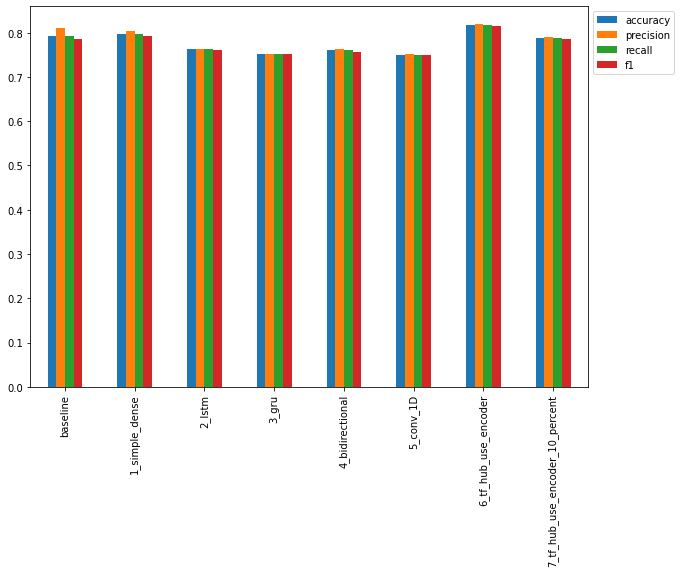

In [ ]:
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

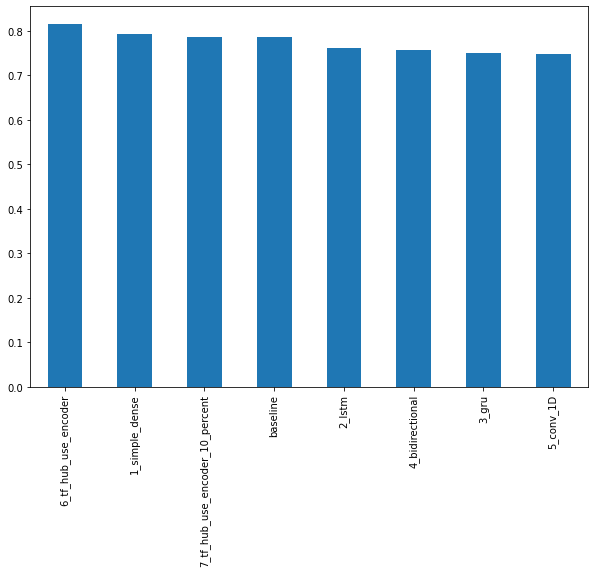

In [ ]:
all_model_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7));

In [ ]:
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP text experiment"\
  --description "distinguishing various model on text"\
  --one_shot

2023-03-07 08:48:43.689075: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-07 08:48:43.689176: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-07 08:48:43.689194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard wi

In [ ]:
!tensorboard dev list

2023-03-07 08:59:10.847236: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-07 08:59:10.847335: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-07 08:59:10.847355: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

***** TensorBoard Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone.

In [ ]:
model_6.save("model_6.h5")

In [ ]:
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4279 - accuracy: 0.8163


[0.42790257930755615, 0.8162729740142822]

In [ ]:
model_6.save("model_6_SavedModel_format")

In [ ]:
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
loaded_model_6_SavedModel_format.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4279 - accuracy: 0.8163


[0.42790257930755615, 0.8162729740142822]

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2023-03-07 16:00:51--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  18.0MB/s    in 51s     

2023-03-07 16:01:42 (18.1 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.inde

In [ ]:
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 12ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [ ]:
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

24/24 [==============================] - 1s 9ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
val_df = pd.DataFrame({"text":val_sentences,
                       "target":val_labels,
                       "pred":model_6_pretrained_preds,
                       "pred_prob":tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob",ascending=False)
most_wrong

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
...,...,...,...,...
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043919
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949


In [ ]:
for row in most_wrong[-10:].itertuples():
  _,text,target,pred,pred_prob = row
  print(f"target:{target},pred:{pred},prob:{pred_prob}")
  print(f"Text:\n{text}\n")
  print("---\n")

target:1,pred:0.0,prob:0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

---

target:1,pred:0.0,prob:0.05507582053542137
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

---

target:1,pred:0.0,prob:0.05460337549448013
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

---

target:1,pred:0.0,prob:0.054597001522779465
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

---

target:1,pred:0.0,prob:0.049637261778116226
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

---

target:1,pred:0.0,prob:0.04391850158572197
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

---

target:1,pred:0.0,prob:0.042086850851774216
Text:
I get to smoke m

In [ ]:
test_sentences = test_df["text"].to_list()
test_sample = random.sample(test_sentences,10)
for test_sample in test_sample:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"pred:{int(pred)},prob:{pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("---\n")

1/1 [==============================] - 0s 57ms/step
pred:1,prob:0.856843888759613
Text:
#WWII #SGM T34 in flames but with tank of gasoline to the outside it is likely that the crew survive . http://t.co/Psz22ky0fM

---

1/1 [==============================] - 0s 58ms/step
pred:0,prob:0.13191959261894226
Text:
My phone is being blown up rn ??

---

1/1 [==============================] - 0s 60ms/step
pred:0,prob:0.08395344763994217
Text:
and no one knows that i'm drowning and i know that i can't fcking survive

---

1/1 [==============================] - 0s 65ms/step
pred:0,prob:0.4455622136592865
Text:
Also confirmed by Senate Marie Therese Dominguez to be Administrator of the Pipelines and Hazardous Materials Safety Administration (PHMSA).

---

1/1 [==============================] - 0s 70ms/step
pred:0,prob:0.08762940764427185
Text:
I liked a @YouTube video from @sharpino1990 http://t.co/LU7dgOwtyl PokÌ©mon Omega Ruby and Alpha Sapphire Wi-Fi Battle #05 cjs064 vs

---

1/1 [===========

In [ ]:
import time
def pred_timer(model,samples):
  """
  Times how long a model takes to make prediction on samples.
  """
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time,time_per_pred

In [ ]:
#calculating tf hub sentence encoder time per pred
model_6_total_pred_time,model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                           samples=val_sentences)
model_6_total_pred_time,model_6_time_per_pred

24/24 [==============================] - 0s 10ms/step


(0.3138681849995919, 0.00041190050524880827)

In [ ]:
#calculate our baseline model time per pred
baseline_total_pred_time,baseline_time_per_pred = pred_timer(model_0,val_sentences)
baseline_total_pred_time,baseline_time_per_pred

(0.019135947999984637, 2.5112792650898473e-05)

In [ ]:
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                               y_pred=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

Text(0, 0.5, 'F1-score  ')

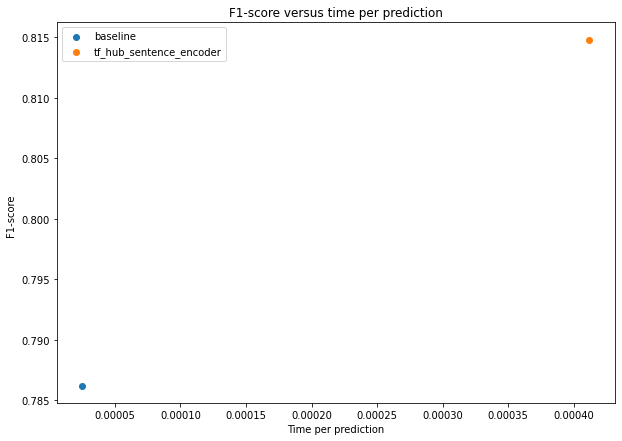

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred,baseline_results["f1"],label="baseline")
plt.scatter(model_6_time_per_pred,model_6_pretrained_results["f1"],label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score  ")